# Consumer Complaints
## Analyzing the December 2014 CFPB Consumer Complaint Database

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
!head complaints_dec_2014.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1177167,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,
1177166,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,
1177165,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,
1177164,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,
1177163,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhan

In [4]:
!tail complaints_dec_2014.csv

1136185,Consumer loan,Vehicle loan,Problems when you are unable to pay,,TX,78577,Web,12/01/2014,12/01/2014,JPMorgan Chase,Closed with explanation,Yes,
1136183,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",,NY,11230,Referral,12/01/2014,12/05/2014,PNC Bank,Closed,Yes,
1136180,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,CA,92124,Web,12/01/2014,12/01/2014,Stellar Recovery Inc.,Closed with explanation,Yes,
1136175,Debt collection,Payday loan,False statements or representation,Attempted to collect wrong amount,IN,46637,Web,12/01/2014,12/01/2014,"Interstate Recovery Service, Inc.",Closed with explanation,No,
1136173,Credit reporting,,Incorrect information on credit report,Account status,VA,23224,Postal mail,12/01/2014,12/05/2014,Experian,Closed with explanation,Yes,Yes
1136172,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",,LA,70452,Web,12/01/2014,12/05/2014,"Servis One, Inc.",C

In [8]:
cdata = pd.read_csv('complaints_dec_2014.csv')

In [9]:
cdata

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


In [12]:
cdata.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Submitted via', 'Date received', 'Date sent to company',
       'Company', 'Company response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [16]:
cdata.Product.unique()

array(['Debt collection', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Mortgage', 'Money transfers', 'Consumer loan',
       'Student loan', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [22]:
date_series = cdata.pop('Date received')

In [23]:
date_series.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [26]:
pd.to_datetime(date_series, format='%m/%d/%Y').head()

0   2014-12-31
1   2014-12-31
2   2014-12-31
3   2014-12-31
4   2014-12-31
Name: Date received, dtype: datetime64[ns]

In [28]:
cdata.index = pd.to_datetime(date_series, format='%m/%d/%Y')

In [48]:
cdata.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

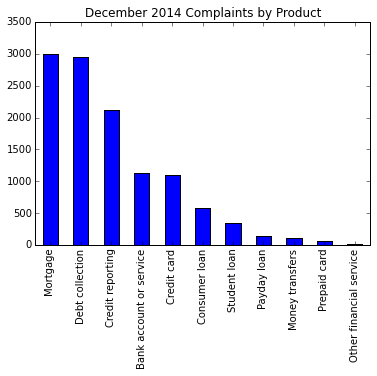

In [47]:
cdata.Product.value_counts().plot(title='December 2014 Complaints by Product', kind='bar')
plt.show()

In [51]:
cdata.Company.value_counts()[:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

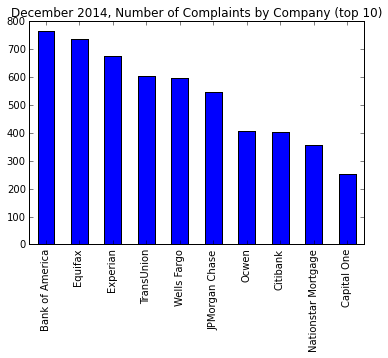

In [54]:
cdata.Company.value_counts()[:10].plot(title='December 2014, Number of Complaints by Company (top 10)', kind='bar')
plt.show()

In [53]:
cdata['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

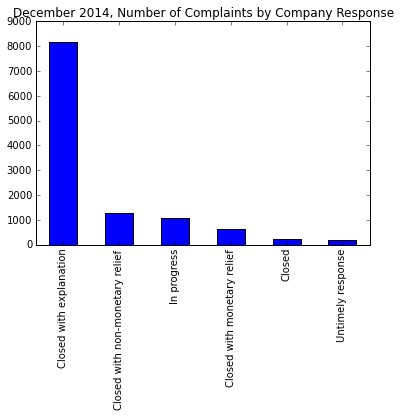

In [70]:
cdata['Company response'].value_counts().plot(title='December 2014, Number of Complaints by Company Response', kind='bar')
plt.show()

In [77]:
cdata2 = cdata.copy()

In [78]:
cdata2['weekday'] = cdata2.index.weekday

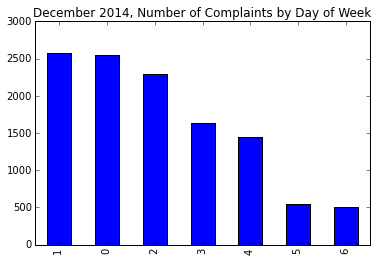

In [80]:
cdata2.weekday.value_counts().plot(title='December 2014, Number of Complaints by Day of Week', kind='bar')
plt.show()

In [85]:
cdata3 = cdata2.replace({'weekday': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}})

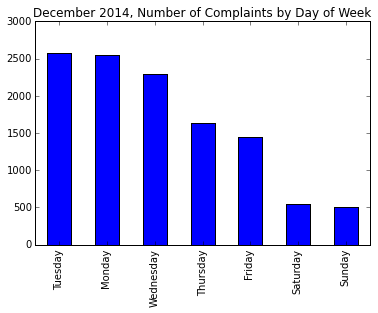

In [86]:
cdata3.weekday.value_counts().plot(title='December 2014, Number of Complaints by Day of Week', kind='bar')
plt.show()